# ASSIGNMENT 6

### Data Analytics 3

1. Implement Simple Naive Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute confusion matrix to find TP,FP,TN,FN, Accuracy, Error Rate, Precision, Recall on the given dataset.

## > Importing Libraries and Loading Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## > Data Preprocessing

In [4]:
#first 5 rows
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#checks total size(rows*columns)
df.size

900

In [6]:
#checks dimensions of the dataframe
df.shape

(150, 6)

In [7]:
#checks the columns present
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
#checks initial statistics
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
#prints information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [10]:
#checks datatype of each column
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## > Data Visualizations

Relplots in seaborn are scatterplot-based visualizations that depict the relationship between variables, accommodating numeric and categorical data, while allowing for additional dimensions and faceting to explore various subgroups or conditions. They provide a concise way to analyze correlations, patterns, and trends in data.

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


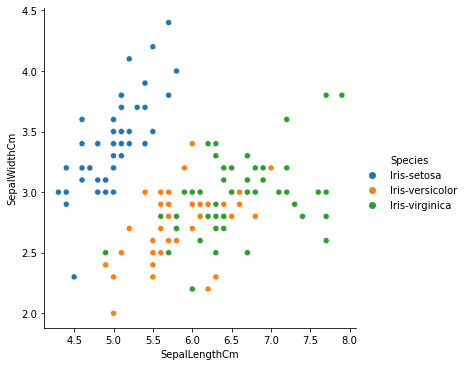

In [11]:
sns.relplot(df['SepalLengthCm'],df['SepalWidthCm'],hue=df['Species'])

C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


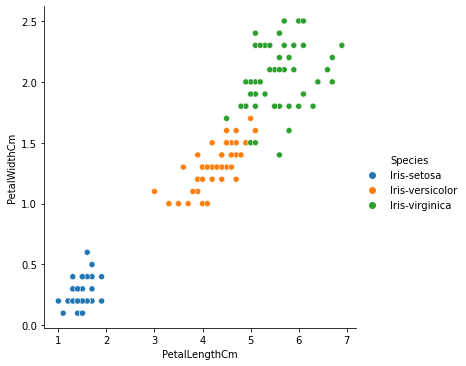

In [12]:
sns.relplot(df['PetalLengthCm'],df['PetalWidthCm'],hue=df['Species'])

Pair Plots are a really simple way to visualize relationships between each variable. It produces a matrix of relationships between each variable in your data for an instant examination of our data. pair plot gives scatter plot of different features. pair plot for iris data set.

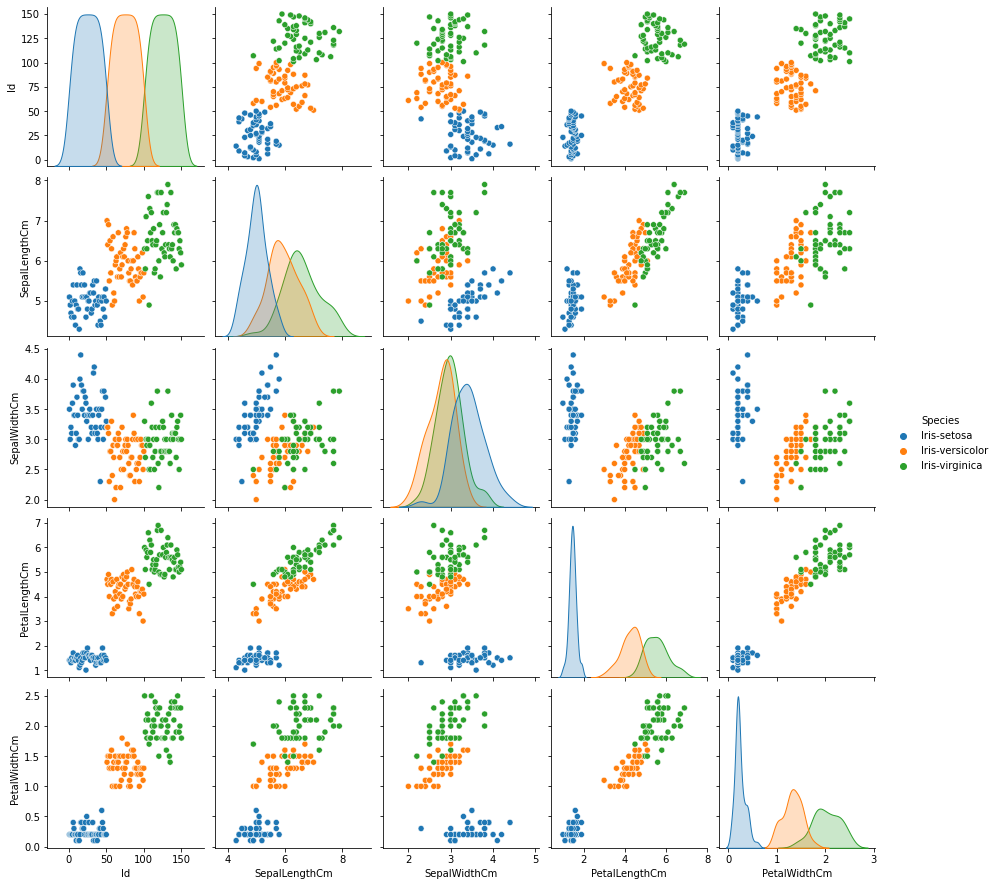

In [13]:
sns.pairplot(df,hue='Species')

Boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

In [14]:
plt.figure(figsize=(15,10))

<Figure size 1080x720 with 0 Axes>

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>

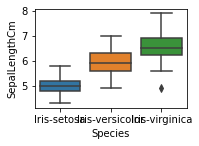

In [15]:
plt.subplot(2,2,1)
sns.boxplot(x='Species',y='SepalLengthCm',data=df)

<AxesSubplot:xlabel='SepalWidthCm', ylabel='Species'>

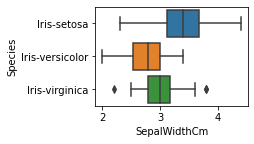

In [16]:
plt.subplot(2,2,2)
sns.boxplot(x='SepalWidthCm',y='Species',data=df)

<AxesSubplot:xlabel='Species', ylabel='PetalLengthCm'>

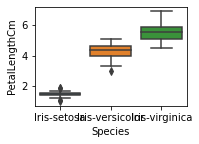

In [17]:
plt.subplot(2,2,3)
sns.boxplot(x='Species',y='PetalLengthCm',data=df)

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Species'>

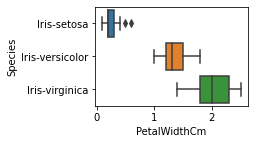

In [18]:
plt.subplot(2,2,4)
sns.boxplot(x='PetalWidthCm',y='Species',data=df)

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the features will reduce the accuracy. Thus features selection should be done carefully. This dataset has less features but still we will see the correlation.

Text(0.5, 1.0, 'Correlation of attribute')

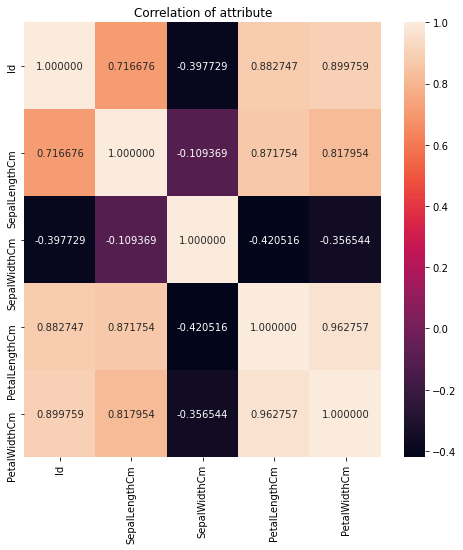

In [19]:
plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,fmt='f').set_title("Correlation of attribute")

Violin Plot is a method to visualize the distribution of numerical data of different variables. It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis. 

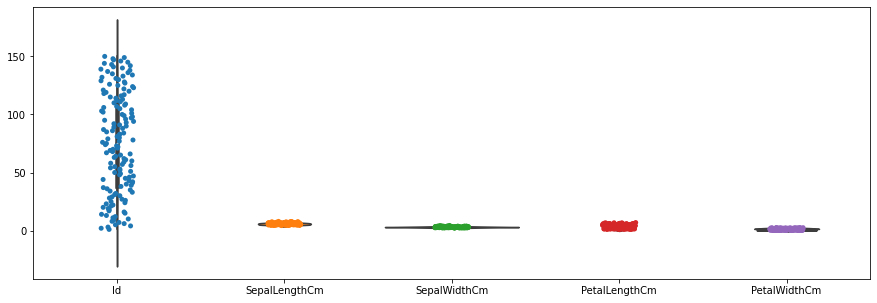

In [35]:
plt.subplots(figsize=(15,5))
sns.violinplot(data=df)
sns.stripplot(data=df)
plt.show()

Area Plot gives us a visual representation of Various dimensions of Iris flower and their range in dataset.

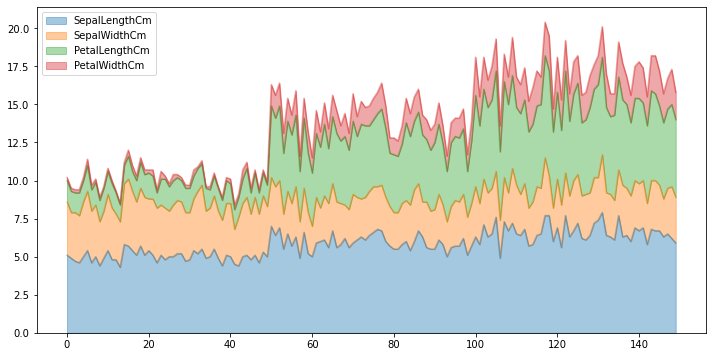

In [37]:
df.plot.area(y=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],alpha=0.4,figsize=(12, 6));

## > Data Formatting

In [41]:
#extracting indepedent variables
x = df.iloc[:,0:4].values

In [42]:
x

array([[  1. ,   5.1,   3.5,   1.4],
       [  2. ,   4.9,   3. ,   1.4],
       [  3. ,   4.7,   3.2,   1.3],
       [  4. ,   4.6,   3.1,   1.5],
       [  5. ,   5. ,   3.6,   1.4],
       [  6. ,   5.4,   3.9,   1.7],
       [  7. ,   4.6,   3.4,   1.4],
       [  8. ,   5. ,   3.4,   1.5],
       [  9. ,   4.4,   2.9,   1.4],
       [ 10. ,   4.9,   3.1,   1.5],
       [ 11. ,   5.4,   3.7,   1.5],
       [ 12. ,   4.8,   3.4,   1.6],
       [ 13. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 15. ,   5.8,   4. ,   1.2],
       [ 16. ,   5.7,   4.4,   1.5],
       [ 17. ,   5.4,   3.9,   1.3],
       [ 18. ,   5.1,   3.5,   1.4],
       [ 19. ,   5.7,   3.8,   1.7],
       [ 20. ,   5.1,   3.8,   1.5],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 22. ,   5.1,   3.7,   1.5],
       [ 23. ,   4.6,   3.6,   1. ],
       [ 24. ,   5.1,   3.3,   1.7],
       [ 25. ,   4.8,   3.4,   1.9],
       [ 26. ,   5. ,   3. ,   1.6],
       [ 27. ,   5. ,   3.4,   1.6],
 

In [43]:
#extracting depedent variables
y = df.iloc[:,5].values

In [44]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

## > Label Encoding

We need to use LabelEncoder to transform categorical labels into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()

In [47]:
y = le.fit_transform(y)

In [48]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## > Splitting Data into 70% training & 30% testing

x_train and x_test represent the input features used for training and evaluating the model, respectively. y_test is the corresponding set of true target variable values for the test set, and y_pred is the predicted target variable values generated by the trained model when applied to the test set.

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7,test_size=0.3)

In [51]:
x_train

array([[ 81. ,   5.5,   2.4,   3.8],
       [145. ,   6.7,   3.3,   5.7],
       [ 46. ,   4.8,   3. ,   1.4],
       [ 14. ,   4.3,   3. ,   1.1],
       [ 78. ,   6.7,   3. ,   5. ],
       [131. ,   7.4,   2.8,   6.1],
       [ 56. ,   5.7,   2.8,   4.5],
       [ 49. ,   5.3,   3.7,   1.5],
       [146. ,   6.7,   3. ,   5.2],
       [ 96. ,   5.7,   3. ,   4.2],
       [ 42. ,   4.5,   2.3,   1.3],
       [ 68. ,   5.8,   2.7,   4.1],
       [ 73. ,   6.3,   2.5,   4.9],
       [ 48. ,   4.6,   3.2,   1.4],
       [ 21. ,   5.4,   3.4,   1.7],
       [ 43. ,   4.4,   3.2,   1.3],
       [ 37. ,   5.5,   3.5,   1.3],
       [ 39. ,   4.4,   3. ,   1.3],
       [ 13. ,   4.8,   3. ,   1.4],
       [122. ,   5.6,   2.8,   4.9],
       [  6. ,   5.4,   3.9,   1.7],
       [121. ,   6.9,   3.2,   5.7],
       [133. ,   6.4,   2.8,   5.6],
       [109. ,   6.7,   2.5,   5.8],
       [124. ,   6.3,   2.7,   4.9],
       [123. ,   7.7,   2.8,   6.7],
       [101. ,   6.3,   3.3,   6. ],
 

In [52]:
x_train.shape

(105, 4)

In [53]:
x_test

array([[ 93. ,   5.8,   2.6,   4. ],
       [  9. ,   4.4,   2.9,   1.4],
       [150. ,   5.9,   3. ,   5.1],
       [118. ,   7.7,   3.8,   6.7],
       [ 74. ,   6.1,   2.8,   4.7],
       [ 30. ,   4.7,   3.2,   1.6],
       [126. ,   7.2,   3.2,   6. ],
       [138. ,   6.4,   3.1,   5.5],
       [134. ,   6.3,   2.8,   5.1],
       [141. ,   6.7,   3.1,   5.6],
       [ 55. ,   6.5,   2.8,   4.6],
       [128. ,   6.1,   3. ,   4.9],
       [ 58. ,   4.9,   2.4,   3.3],
       [132. ,   7.9,   3.8,   6.4],
       [111. ,   6.5,   3.2,   5.1],
       [103. ,   7.1,   3. ,   5.9],
       [ 45. ,   5.1,   3.8,   1.9],
       [ 71. ,   5.9,   3.2,   4.8],
       [ 52. ,   6.4,   3.2,   4.5],
       [108. ,   7.3,   2.9,   6.3],
       [ 33. ,   5.2,   4.1,   1.5],
       [ 77. ,   6.8,   2.8,   4.8],
       [104. ,   6.3,   2.9,   5.6],
       [ 62. ,   5.9,   3. ,   4.2],
       [112. ,   6.4,   2.7,   5.3],
       [ 12. ,   4.8,   3.4,   1.6],
       [  1. ,   5.1,   3.5,   1.4],
 

In [54]:
x_test.shape

(45, 4)

In [55]:
y_train

array([1, 2, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2,
       2, 2, 2, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 0, 2, 1,
       1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 1,
       1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 2, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 2, 0, 0, 1, 2, 2, 1, 1, 0])

In [56]:
y_train.shape

(105,)

In [57]:
y_test

array([1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1,
       2, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2,
       0])

In [58]:
y_test.shape

(45,)

## > Initializing Naive Bayes Model and Training

Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.

It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. 

In [59]:
from sklearn.naive_bayes import GaussianNB

In [60]:
model = GaussianNB()

In [61]:
model.fit(x_train,y_train)

GaussianNB()

## > Prediction

By comparing y_pred with the actual values of y_test, we can evaluate the model's performance and assess how well it generalizes to unseen data.

In [62]:
prediction = model.predict(x_test)

In [63]:
prediction

array([1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1,
       2, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 1, 2, 1, 1, 2, 2,
       0])

In [64]:
y_test

array([1, 0, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 0, 1, 1, 2, 0, 1,
       2, 1, 2, 0, 0, 1, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2,
       0])

## > Confusion Matrix

A confusion matrix is a matrix that summarizes the performance of a machine learning model on a set of test data

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
cm = confusion_matrix(y_test,prediction) 

In [67]:
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  1, 20]], dtype=int64)

Text(0.5, 1.0, 'Confusion Matrix')

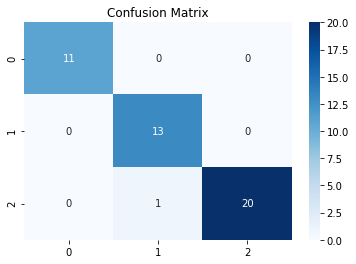

In [68]:
sns.heatmap(cm,annot=True,cmap='Blues').set_title("Confusion Matrix")

## > Accuracy

In [69]:
from sklearn.metrics import accuracy_score

In [70]:
acc = accuracy_score(y_test,prediction)

In [71]:
acc

0.9777777777777777

In [72]:
#Calculate performance metrics

from sklearn.metrics import classification_report

print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.93      1.00      0.96        13
           2       1.00      0.95      0.98        21

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



## > TP,FP,TN,FN

True positive (TP): correct positive prediction

False positive (FP): incorrect positive prediction

True negative (TN): correct negative prediction

False negative (FN): incorrect negative prediction

In [73]:
tp = cm[0,[0]]
fp = cm[0,[1]]
fn = cm[1,[0]]
tn = cm[1,[1]]

In [74]:
print("TRUE POSITIVE : ",tp)
print("FALSE POSITIVE : ",fp)
print("FALSE NEGATIVE : ",fn)
print("TRUE NEGATIVE : ",tn)

TRUE POSITIVE :  [11]
FALSE POSITIVE :  [0]
FALSE NEGATIVE :  [0]
TRUE NEGATIVE :  [13]


## > Accuracy(using cm)

Accuracy (ACC) is calculated as the number of all correct predictions divided by the total number of the dataset.

In [75]:
accuracy = (tp+tn)/(tp+fp+tn+fn)

In [76]:
print("ACCURACY :",accuracy*100)

ACCURACY : [100.]


## > Error Rate

Error rate is calculated as the number of all incorrect predictions divided by the total number of the dataset.

In [77]:
error_rate = (fp+fn)/(tp+fp+tn+fn)

In [78]:
print("ERROR RATE :",error_rate*100)

ERROR RATE : [0.]


## > Precision

Precision is calculated as the number of correct positive predictions divided by the total number of positive predictions.

In [79]:
precision = (tp)/(tp+fp)

In [80]:
print("PRECISION :",precision*100)

PRECISION : [100.]


## > Recall

Recall indicates the proportion of correctly identified positive instances out of all the actual positive instances.

In [81]:
recall = (tp)/(tp+fn)

In [82]:
print("RECALL :",recall*100)

RECALL : [100.]


## > Specify

Specificity is calculated as the number of correct negative predictions divided by the total number of negatives.

In [83]:
specify = (tn)/(tn+fp)

In [84]:
print("SPECIFY :",specify*100)

SPECIFY : [100.]


C:\Users\Shravani Sajekar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

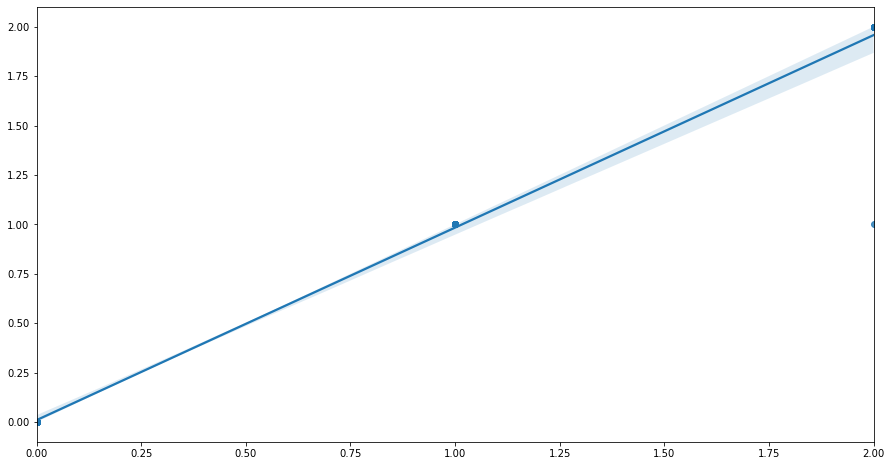

In [85]:
plt.figure(figsize=(15,8))
sns.regplot(y_test,prediction)